# Laboratory 3 - Moving average convergence divergence (MACD)
#### dr hab. inż. Grzegorz Fotyga, prof. PG

The goal of this lab is to implement one of the most popular indicators used by the stock brokers - MACD. It can be used to analyze the trends and to determine the best buy / sell moments at the stock market. You will test that tool on the WIG20 historical data. 

## 1 Introduction - MACD indicator

Moving average convergence divergence (MACD) is one of the simplest and most effective trend-following indicators used in technical analysis of stock prices. As the name suggests, the moving average convergence divergence tool is a comparison of the relationship between the two moving average lines of a historical price data.

Specifically, the first line of the two-line indicator is the difference between the values of two moving averages (explained in section 2), and is considered the MACD line. The second line (called a SIGNAL) is a moving average of the MACD line. Intersection/crossing of the MACD and SIGNAL lines are often seen as buy and sell moments (see Fig. 1). Both lines are centered on a zero line, and will travel above and below that level depending on the strength and length of a trend.


![Figure 1](macd_example_plot.png "MACD example")


Example: let’s assume, we have the stock prices from last 30 days. The goal is to predict basing on that data the tomorrow’s stock price, using the technical analysis tools, such as MACD. Or to predict when the increasing/decreasing trend will change. In other words, to determine the best moments to make buying / selling decisions.


## 2 Arithmetic average

Average - the simplest and most commonly used average is the arithmetic one: sum of a collection of prices divided by the number of prices in the collection.

Tasks: 

1) load *data_10_days.txt*
2) plot it using plt.plot() function 
3) Compute the average value of the data using 2 methods: 
    * direct implementation of arithmetic mean (using eg. *for* loop)
    * *np.mean()*
    
    Compare both results. 

2471.348
2471.348


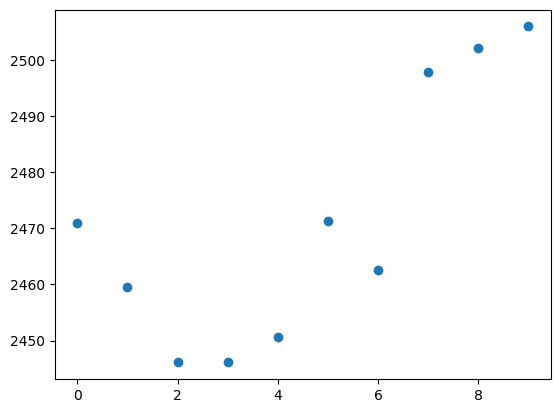

In [2]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data_10_days.txt'
data_10_days = np.loadtxt(file_path, delimiter=',', dtype=float)
plt.plot(data_10_days,'o')
average = 0
for i in range(10):
    average += data_10_days[i]
print(average/10)
print(np.mean(data_10_days))
# your code

## 3 Exponential (weighted) average
Exponential (weighted) average means that we want to put more weight on the prices of the most recent days and less weight on the old prices. The weights in our case decrease exponentially.
* $EMA_N = \dfrac{p_0 + (1-\alpha)p_1 + (1-\alpha)^2p_2 + ... + (1-\alpha)^{n} p_{n}}{1 + (1-\alpha) + (1-\alpha)^2 + ... + (1-\alpha)^{n}}$
* $p_i$ is the stock price form the $i$-th day, $p_0$ is today’s price and $p_n$ - the price from $n$ days ago
* $\alpha = \dfrac{2}{n+1}$
* $n+1$ -  number of prices (days) taken into account

Tasks: 

4) Compute the exponential average value of the data for *n=9*. 
5) Define *exp_avr()* function, which computes exponential average for specified data and *n*

In [52]:
# your code
file_path = 'data_10_days.txt'
data_10_days = np.loadtxt(file_path, delimiter=',', dtype=float)

table_a = []
table_p = []
a = 2 / (10 + 1)
for n in range(10):
    table_a.append((1-a)**n)

sum_a = sum(table_a)
i = 0
for n in range(9, -1, -1):
    table_p.append(data_10_days[n] * table_a[i])
    i += 1

sum_p = sum(table_p)
print("Average from the last 9 days: ", sum_p / sum_a)


Average from the last 9 days:  2481.6509049930946


In [84]:
# your code
def exp_avr(days, data):
    table_a = []
    table_p = []
    a = 2 / (days + 1)
    for n in range(days):
        table_a.append((1-a)**n)

    i = 0
    for n in range(9, -1, -1):
        table_p.append(data_10_days[n] * table_a[i])
        i += 1
    print(table_a)
    return sum(table_p)/ sum(table_a)


file_path = 'data_10_days.txt'
data_10_days = np.loadtxt(file_path, delimiter=',', dtype=float)


print("Average from the last 9 days: ", exp_avr(10, data_10_days))

[1.0, 0.8181818181818181, 0.6694214876033057, 0.5477084898572501, 0.44812512806502275, 0.3666478320532004, 0.2999845898617094, 0.2454419371595804, 0.20081613040329305, 0.16430410669360337]
Average from the last 9 days:  2481.6509049930946


## 4 Moving average
Let’s assume, we have a full data set, for example opening stock prices from the whole last year (one price a day). Commonly, we are interested in creating series of averages of different subsets of that full data set, for example the averages of the stock prices from the last 10 days, computed everyday. moving means that it is applied to subsequent data points.

Task:

6) Load *data_1000_days.txt* file and compute exponential moving average using *exp_avr()* function for *n=10* starting with 11-th day ($EMA_{10}$)

In [76]:
file_path = 'data_1000_days.txt'
data_1000_days = np.loadtxt(file_path, delimiter=',', dtype=float)

exp_aver = np.zeros_like(data_1000_days)
# your code
def exp_avr(start, days, data):
    table_a = []
    table_p = []
    a = 2 / (days + 1)
    for n in range(days):
        table_a.append((1-a)**n)

    i = 0
    for n in range(days):
        table_p.append(data[start - n] * table_a[i])
        i += 1

    return sum(table_p)/ sum(table_a)

ema = np.zeros_like(data_1000_days)
for i in range(990):
    ema[i + 10]=(exp_avr(10 + i , 10 ,data_1000_days))
ema = ema[10:]
print(ema)

[2484.60783832 2490.82367176 2507.75333136 2522.46456551 2527.41981183
 2532.8725428  2538.01617303 2545.82018948 2556.18513791 2570.45088611
 2575.28136409 2570.22563343 2566.32105381 2572.39831443 2568.44077592
 2555.28470729 2554.40177386 2556.4124873  2544.22007623 2532.96086032
 2538.81599024 2544.5068412  2523.73892923 2496.1123397  2461.1328585
 2450.34433904 2445.15317664 2441.98677556 2450.38049566 2447.27767816
 2427.62454195 2425.15815512 2419.3798257  2408.98232756 2389.24545213
 2376.61112171 2352.75431304 2339.70693653 2341.67998152 2352.07738958
 2364.69925491 2373.22165564 2375.42065184 2384.55811466 2373.99367674
 2370.44363452 2367.79626117 2363.60454135 2369.00238107 2372.99710762
 2370.78008379 2378.10077458 2378.68147524 2373.58167514 2379.20824982
 2380.7463976  2377.3019377  2370.53928599 2362.65906841 2357.32288109
 2348.74371556 2333.22180104 2314.42096082 2306.98627119 2303.71222424
 2300.5287415  2302.34707243 2310.16618406 2314.34588382 2317.49448142
 2327.3

## 5. MACD indicator 

MACD and SIGNAL are defined as follows:
1. MACD = EMA12 − EMA26, where EMA12 and EMA26 are computed based on the stock prices data.
2. SIGNAL = EMA9 is computed based on MACD plot.

Tasks:

7) Generate MACD and SIGNAL for *data_1000_days.txt*
8) Plot MACD and SIGNAL. Observe the correlation between data_1000_days plot and cross sections of MACD and SIGNAL. Use plt.xlim() and plt.ylim().   
9) Write short comments - can you predict the future prices using MACD indicator? 
10) Save the notebook and upload on enauczanie course site. 

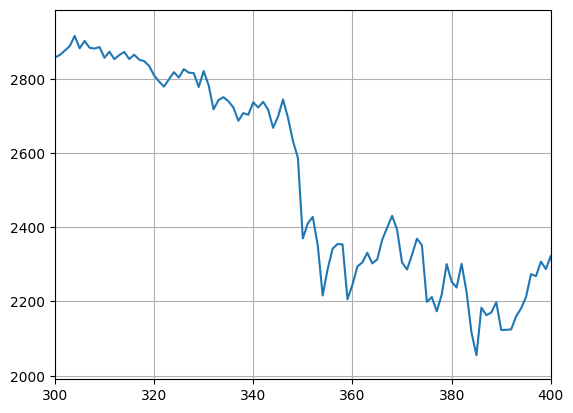

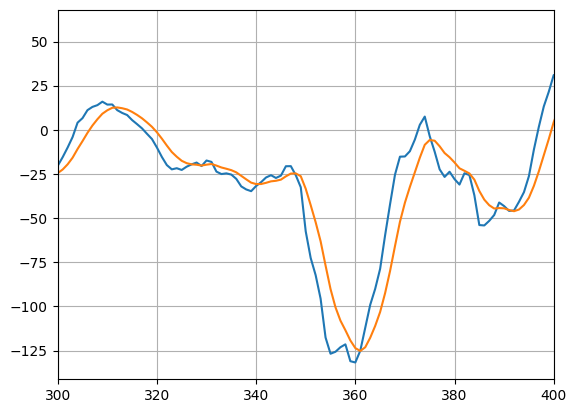

In [109]:
file_path = 'data_1000_days.txt'
data_1000_days = np.loadtxt(file_path, delimiter=',', dtype=float)

exp_aver = np.zeros_like(data_1000_days)
# your code
def exp_avr(start, days, data):
    table_a = []
    table_p = []
    a = 2 / (days + 1)
    for n in range(days):
        table_a.append((1-a)**n)

    i = 0
    for n in range(days):
        table_p.append(data[start - n] * table_a[i])
        i += 1

    return sum(table_p)/ sum(table_a)


exp_aver12 = np.zeros_like(data_1000_days)
exp_aver26 = np.zeros_like(data_1000_days)

for i in range(974):
    exp_aver12[i + 26]=(exp_avr(26 + i , 12 ,data_1000_days))
#exp_aver12 = exp_aver12[26:]
#print(exp_aver12)

for i in range(974):
    exp_aver26[i + 26]=(exp_avr(26 + i , 26 ,data_1000_days))
#exp_aver26 = exp_aver26[26:]
#print(exp_aver26)

MACD = np.zeros_like(data_1000_days)
MACD = exp_aver12 - exp_aver26

signal = np.zeros_like(data_1000_days)
for i in range(974):
    signal[i + 9]=(exp_avr(9 + i , 9 ,MACD))

plt.figure()
plt.plot(data_1000_days)
plt.xlim(300, 400)  
plt.grid()
plt.show()

plt.figure()
plt.plot(MACD)   
plt.plot(signal)   
plt.xlim(300, 400)  
plt.grid()
plt.show()
